<a href="https://colab.research.google.com/github/Esmreety/Multiclass-Classifier/blob/master/Rock_Paper_Scissors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import backend as k
import numpy as np
from keras.preprocessing import image
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [ ]:
img_width, img_height = 150, 150
train_data_dir = '/content/rps'
validation_data_dir = '/content/rps-test-set'
batch_size = 126

if k.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
train_datagen = ImageDataGenerator(
                     rescale = 1./255,
                     rotation_range = 40, 
                     width_shift_range = 0.2,
                     height_shift_range = 0.2,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True,
                     fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                              train_data_dir,
                              target_size = (img_width, img_height),
                              batch_size = batch_size,
                                class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
                                validation_data_dir,
                                target_size = (img_width, img_height),
                                batch_size = batch_size,
                                class_mode = 'categorical')
                                                             

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()
model.compile(optimizer = RMSprop(lr=1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:

history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 21s 1s/step - loss: 1.0900 - accuracy: 0.3667 - val_loss: 1.0663 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 19s 957ms/step - loss: 1.0454 - accuracy: 0.4417 - val_loss: 0.9341 - val_accuracy: 0.5780
Epoch 3/25
20/20 [==============================] - 19s 951ms/step - loss: 0.9792 - accuracy: 0.5214 - val_loss: 0.8329 - val_accuracy: 0.8172
Epoch 4/25
20/20 [==============================] - 19s 946ms/step - loss: 0.9107 - accuracy: 0.5786 - val_loss: 0.8882 - val_accuracy: 0.6452
Epoch 5/25
20/20 [==============================] - 19s 938ms/step - loss: 0.8263 - accuracy: 0.6417 - val_loss: 0.6532 - val_accuracy: 0.7527
Epoch 6/25
20/20 [==============================] - 19s 933ms/step - loss: 0.7844 - accuracy: 0.6536 - val_loss: 0.5085 - val_accuracy: 0.8898
Epoch 7/25
20/20 [==============================] - 19s 930ms/step - loss: 0.7204 - accuracy: 0.6996 - val_loss: 0.4984 - val_accuracy: 0.7984
Ep

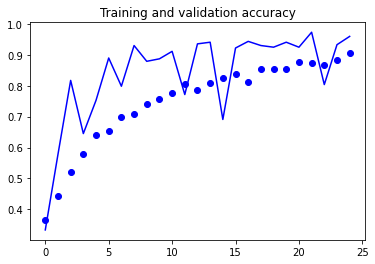

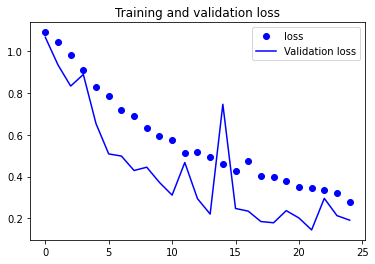

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving scissors-hires2.png to scissors-hires2.png
scissors-hires2.png
[[0. 0. 1.]]
